In [2]:
#import pandas as pd
import wetterdienst
import wetterdienst.provider.dwd.observation

In [3]:
request = wetterdienst.provider.dwd.observation.DwdObservationRequest(
    parameter=wetterdienst.provider.dwd.observation.DwdObservationParameter.DAILY.SNOW_DEPTH,
    resolution=wetterdienst.Resolution.DAILY,
    period=wetterdienst.Period.HISTORICAL,
)

In [4]:
stations = request.all()

In [16]:
stations.df[
    (stations.df.start_date < '1960') 
    & (stations.df.latitude < 48)
    & (stations.df.end_date > '2022')
]

AttributeError: 'DataFrame' object has no attribute 'start_date'

In [7]:
stations = request.filter_by_station_id('01550')
stations.df

ValueError: could not convert string to float: '478     47'

In [ ]:
for result in stations.values.query():
    print(result.df.tail())

In [8]:
station_id = '02290' # Hohenpeißenberg
station_id = '03730' # Oberstdorf
station_id = '05941' # Reit im Winkl
#station_id = '01346' # Feldberg
#station_id = '04261' # Rosenheim
#station_id = '03307' # Mittenwald Buckelwiesen
station_id = '01550' # Garmisch-Partenkirchen


request = wetterdienst.provider.dwd.observation.DwdObservationRequest(
    parameter=wetterdienst.provider.dwd.observation.DwdObservationParameter.DAILY.SNOW_DEPTH,
    resolution=wetterdienst.Resolution.DAILY,
    period=wetterdienst.Period.HISTORICAL,
)

value_results = next(request.filter_by_station_id(station_id).values.query())

df = value_results.df
df = df.set_index('date')
df_historical = df

request = wetterdienst.provider.dwd.observation.DwdObservationRequest(
    parameter=wetterdienst.provider.dwd.observation.DwdObservationParameter.DAILY.SNOW_DEPTH,
    resolution=wetterdienst.Resolution.DAILY,
    period=wetterdienst.Period.RECENT,
)

value_results = next(request.filter_by_station_id(station_id).values.query())

df = value_results.df
df = df.set_index('date')
df_recent = df

df = pd.concat([df_historical, df_recent])
df = df[~df.index.duplicated(keep='first')]

ValueError: could not convert string to float: '478     47'

In [283]:
%matplotlib inline

/var/folders/8f/z1lq69v144zb2p1_l1twh7kh0006md/T/ipykernel_96086/4073124433.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  df.resample('4W').max().value.plot(figsize=(14, 6))


<Axes: xlabel='date'>

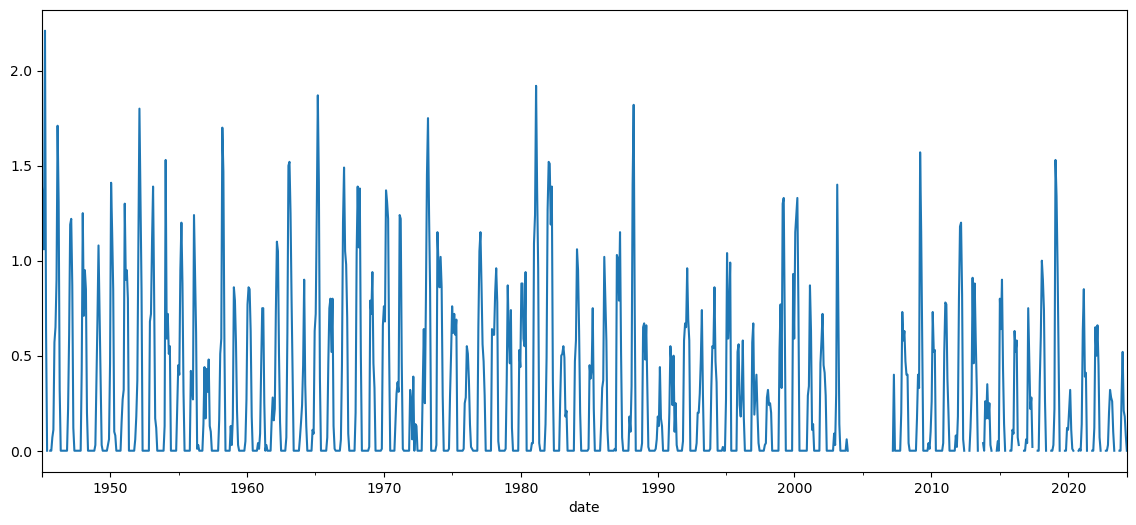

In [284]:
df.resample('4W').max().value.plot(figsize=(14, 6))

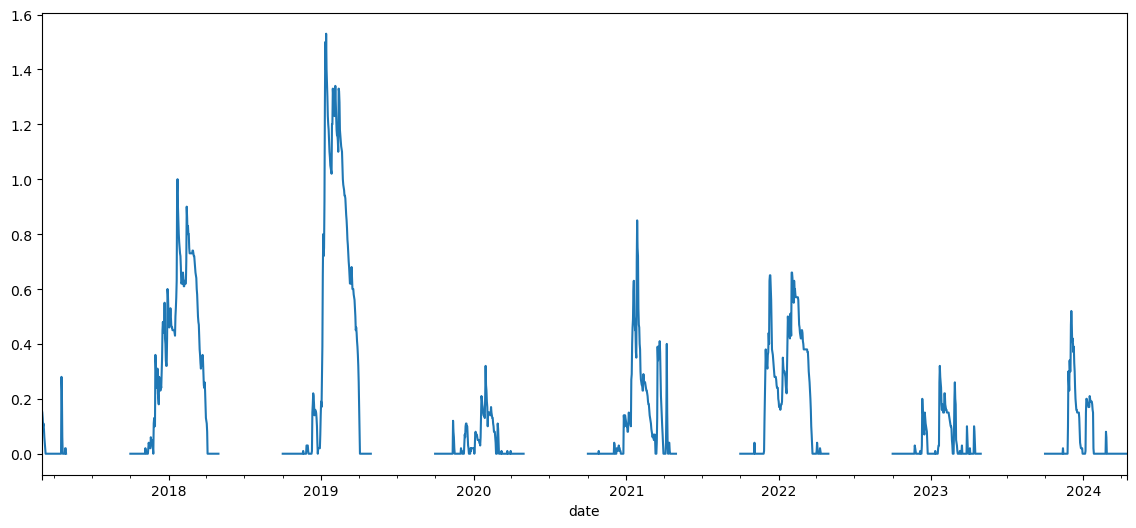

In [285]:
df[-2600:].value.plot(figsize=(14, 6));

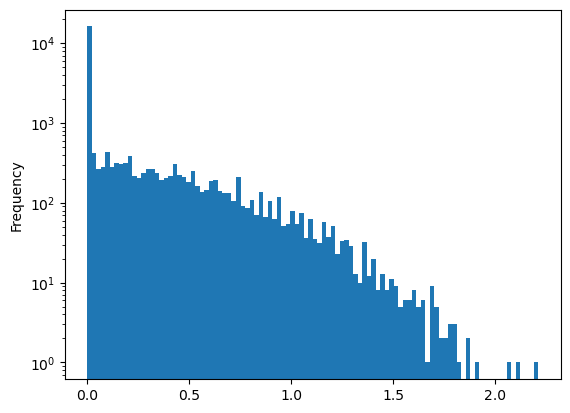

In [286]:
df.value.plot.hist(bins=100)
import matplotlib.pyplot as plt
plt.yscale('log')

In [287]:
df.value[df.value > 0].min()

0.01

In [288]:
df.head()

,station_id,dataset,parameter,value,quality
date,,,,,
1945-01-01 00:00:00+00:00,05941,climate_summary,snow_depth,1.14,5.0
1945-01-02 00:00:00+00:00,05941,climate_summary,snow_depth,1.40,5.0
1945-01-03 00:00:00+00:00,05941,climate_summary,snow_depth,1.27,5.0
1945-01-04 00:00:00+00:00,05941,climate_summary,snow_depth,1.18,5.0
1945-01-05 00:00:00+00:00,05941,climate_summary,snow_depth,1.10,5.0


In [289]:
df['month'] = df.index.month

In [290]:
df['winter_season'] = df.shift(5, freq='M').index.year 
df = df[df.month.isin([11, 12, 1, 2, 3, 4])]

df = df[df.index.year > 1920]

In [291]:
import pandas as pd

In [292]:
df.index

DatetimeIndex(['1945-01-01 00:00:00+00:00', '1945-01-02 00:00:00+00:00',
               '1945-01-03 00:00:00+00:00', '1945-01-04 00:00:00+00:00',
               '1945-01-05 00:00:00+00:00', '1945-01-06 00:00:00+00:00',
               '1945-01-07 00:00:00+00:00', '1945-01-08 00:00:00+00:00',
               '1945-01-09 00:00:00+00:00', '1945-01-10 00:00:00+00:00',
               ...
               '2024-04-05 00:00:00+00:00', '2024-04-06 00:00:00+00:00',
               '2024-04-07 00:00:00+00:00', '2024-04-08 00:00:00+00:00',
               '2024-04-09 00:00:00+00:00', '2024-04-10 00:00:00+00:00',
               '2024-04-11 00:00:00+00:00', '2024-04-12 00:00:00+00:00',
               '2024-04-13 00:00:00+00:00', '2024-04-14 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='date', length=13756, freq=None)

In [293]:
g_list = []
for winter_season, g in df.groupby(df.winter_season):
    g['non_nan_values_per_season'] = (~g.value.isna()).sum()
    #g['month_day'] = range(len(g.index))
    date_range = pd.date_range(f'{winter_season-1}-11-01 00:00:00+00:00', f'{winter_season}-03-31 00:00:00+00:00')
    #g['day_of_winter_season'] = np.where(date_range.isin(g.index))
    g_list.append(g)

df_new = pd.concat(g_list)

In [294]:
date_range = pd.date_range(f'{winter_season-1}-11-01 00:00:00+00:00', f'{winter_season}-03-31 00:00:00+00:00')

import numpy as np
np.where(date_range.isin(g.index))

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151]),)

<Axes: xlabel='date'>

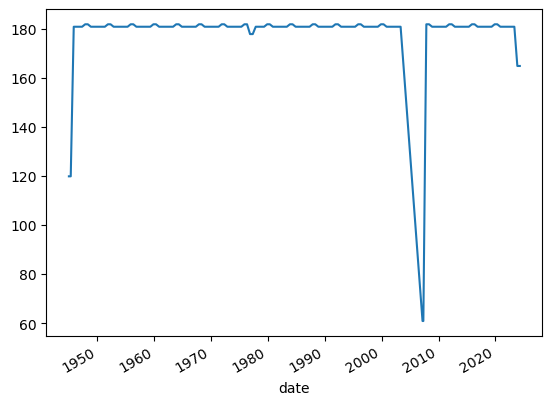

In [295]:
df_new.non_nan_values_per_season.plot()

array([ 1.40428364e+01,  9.72060128e+01,  1.00000000e+01,  6.71603487e+00,
        1.51026993e+01,  1.03101336e+00, -4.82856593e-03,  1.10000000e+02])

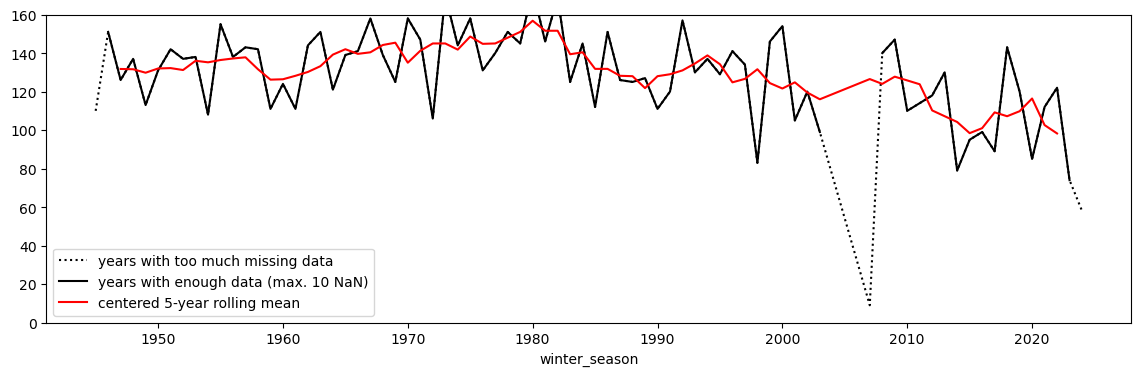

In [296]:
snow_min = 0.01

days_with_snow_cover = (df_new.value >= snow_min).groupby(df_new.winter_season).sum()
winter_season_with_enough_data = df_new.non_nan_values_per_season.groupby(df_new.winter_season).max() > 170

days_with_snow_cover.plot(figsize=(14, 6), c='k', linestyle=':', label='years with too much missing data')

days_with_snow_cover[~winter_season_with_enough_data] = pd.NA

days_with_snow_cover.plot(c='k', figsize=(14, 4), label='years with enough data (max. 10 NaN)')
#days_with_snow_cover.rolling(5, center=True, min_periods=4).mean().rolling(3, center=True, min_periods=3).mean().plot(c='r', alpha=1)
days_with_snow_cover.rolling(5, center=True, min_periods=4).mean().plot(c='r', label='centered 5-year rolling mean')
#days_with_snow_cover.rolling(10, center=True, min_periods=9).mean().plot(c='r', alpha=0.3)

plt.legend()
plt.ylim(0, 160);


from scipy.optimize import curve_fit

def f(year, long_amplitude, long_freq, long_phase, short_amplitude, short_freq, short_phase, trend, offset):
    x = year * 2 * np.pi
    y_long = np.sin(x / long_freq + 2 * np.pi * long_phase) * long_amplitude
    y_short = np.sin(x / short_freq + 2 * np.pi * short_phase) * short_amplitude
    y = y_long + y_short + offset + x * trend
    return y
    
x = np.arange(0, len(days_with_snow_cover))
y = f(
    x, 
    long_amplitude=15, 
    long_freq=75, 
    long_phase=0.6, 
    short_amplitude=15,
    short_freq=14,
    short_phase=0.1,
    offset = 110,
    trend = -0.03,
)
#plt.plot(days_with_snow_cover.index, y)
#plt.plot(days_with_snow_cover.index, f(days_with_snow_cover.index, *popt))
popt


array([ 1.73440239e+01,  9.74588014e+01,  1.00000000e+01,  5.33899323e+00,
        1.42651172e+01, -6.58523772e+00,  1.29720251e-03,  1.10000000e+02])

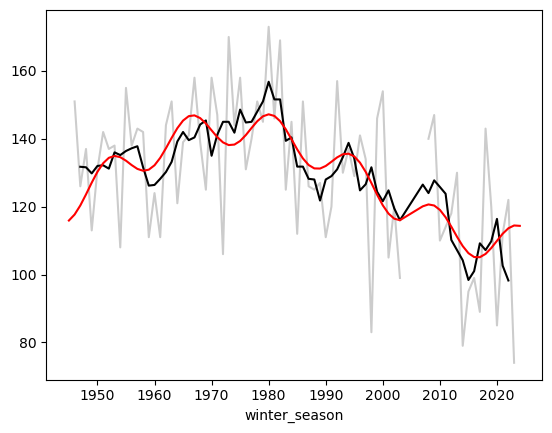

In [297]:
xdata = days_with_snow_cover.rolling(5, center=True, min_periods=4).mean().dropna().index.values
ydata = days_with_snow_cover.rolling(5, center=True, min_periods=4).mean().dropna().values

popt, pcov = curve_fit(
    f=f, 
    xdata=xdata,
    ydata=ydata,
    bounds=(
        #long_amplitude, long_freq, long_phase, short_amplitude, short_freq, short_phase, trend, offset
        (  0,  30, -10,   0, 10, -10, -1, 105),
        ( 40, 100,  10,  20, 20,  10,  1, 110),
    ),
)

days_with_snow_cover.plot(c='k', alpha=0.2)
days_with_snow_cover.rolling(5, center=True, min_periods=4).mean().plot(c='k', label='centered 5-year rolling mean')
plt.plot(days_with_snow_cover.index, f(days_with_snow_cover.index, *popt), 'r')

popt

<Axes: xlabel='winter_season'>

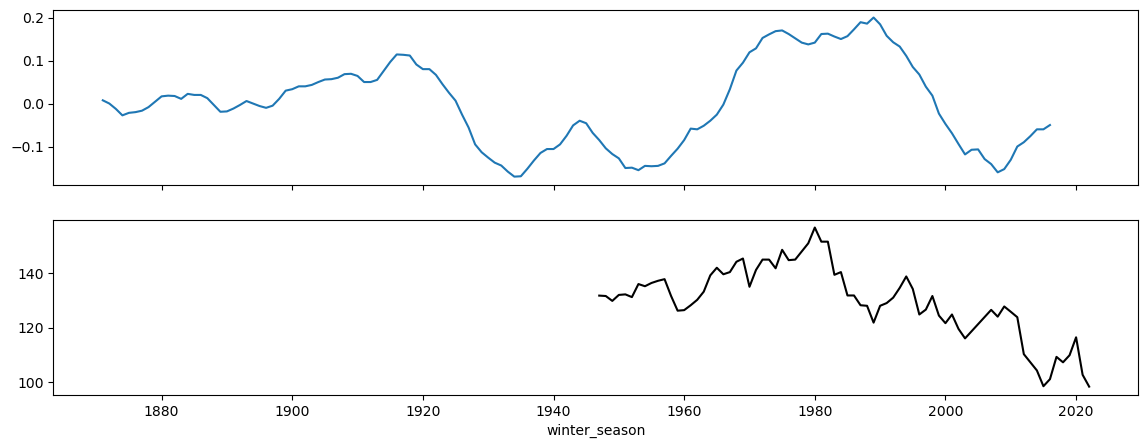

In [298]:
df_amo = pd.read_csv(
    'https://climatedataguide.ucar.edu/sites/default/files/2022-03/amo_monthly.10yrLP.txt',
    sep='\s+',
    skiprows=1,
    index_col=0,
    na_values=-999,
)
df_amo.columns = np.arange(0, 12)

fig, axs = plt.subplots(2, 1, figsize=(14, 5), sharex=True)
(-1 * df_amo.mean(axis=1).dropna()).plot(ax=axs[0])
days_with_snow_cover.rolling(5, center=True, min_periods=4).mean().plot(c='k', label='centered 5-year rolling mean')


In [299]:
df_shifted = df.shift(5 * 30, freq='D')
df_shifted['day_of_year'] = df_shifted.index.day_of_year
df_shifted['year'] = df_shifted.index.year

df_pivoted = df_shifted.pivot(index='year', columns='day_of_year', values='value')
#df_pivoted

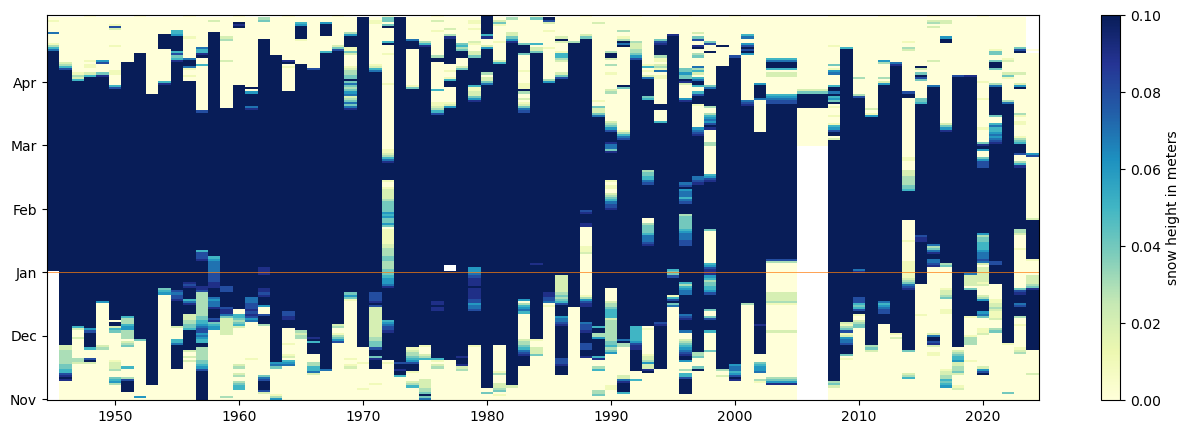

In [300]:
fig, ax = plt.subplots(figsize=(16, 5))
pc = plt.pcolormesh(df_pivoted.index, df_pivoted.columns - 5 * 30, df_pivoted.T, vmin=0, vmax=0.1, cmap='YlGnBu');
plt.yticks([-60, -30, 0, 30, 60, 90], labels=['Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr']);
plt.axhline(y=0, c='C1', linewidth=0.5)
plt.colorbar(pc, label='snow height in meters');